In [ ]:
# Colab資料夾設定方法
import os 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 查看現在工作路徑
#!pwd
#!ls

os.chdir("/content/drive/MyDrive/RFM專題")  #切換該目錄
#os.listdir()  確認目錄內容
!ls

 201910_apple_AND_productID.csv
 201910_apple.csv
 AI_Applications-master
'CSV檔案-只留Apple這個品牌的資料(捷近)'
 來自凱元「團專-分析高活躍度客戶偏好的商品.ipynb」的副本
 團專-分析常貴客偏好消費商品.ipynb
 「團專-分析高活躍度客戶偏好的商品.ipynb」的副本
 「常貴客熱銷圖.ipynb」的副本
'常貴客熱銷圖(原本).ipynb'
 書榜LINE裡面的上傳的表格
 購買頻率與銷售額關係圖.ipynb


In [ ]:
import pandas as pd 
import numpy as np
import datetime
import platform

In [ ]:
df=pd.read_csv("201910_apple.csv",encoding='utf-8')
#df.shape

In [ ]:
df["order_date"]=df["event_time"].values  
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,order_date
0,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 00:00:04 UTC
1,19,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 00:00:19 UTC
2,20,2019-10-01 00:00:20 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f,2019-10-01 00:00:20 UTC
3,25,2019-10-01 00:00:24 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f,2019-10-01 00:00:24 UTC
4,51,2019-10-01 00:00:41 UTC,view,1003141,2053013555631882655,electronics.smartphone,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da,2019-10-01 00:00:41 UTC
...,...,...,...,...,...,...,...,...,...,...,...
4092647,42448699,2019-10-31 23:59:33 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,519277091,62fadce6-aa4a-4dde-92fc-c04c22982df5,2019-10-31 23:59:33 UTC
4092648,42448706,2019-10-31 23:59:35 UTC,view,1002524,2053013555631882655,electronics.smartphone,apple,531.26,565404816,d9cf0ac4-c3ec-4e1f-83aa-326b1e7b1581,2019-10-31 23:59:35 UTC
4092649,42448722,2019-10-31 23:59:44 UTC,view,4804056,2053013554658804075,electronics.audio.headphone,apple,160.57,544501248,e330d051-37ad-4dc3-b1ee-ff16a28b7998,2019-10-31 23:59:44 UTC
4092650,42448728,2019-10-31 23:59:47 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,536554637,814dd3f8-970e-4a98-8e84-9d3fb6375604,2019-10-31 23:59:47 UTC


In [ ]:
del df["event_time"]

In [ ]:
#df
df=df[["order_date","event_type","product_id","category_id","category_code","brand","price","user_id","user_session"]] 
df

,order_date,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
1,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
2,2019-10-01 00:00:20 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
3,2019-10-01 00:00:24 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f
4,2019-10-01 00:00:41 UTC,view,1003141,2053013555631882655,electronics.smartphone,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da
...,...,...,...,...,...,...,...,...,...
4092647,2019-10-31 23:59:33 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1091.33,519277091,62fadce6-aa4a-4dde-92fc-c04c22982df5
4092648,2019-10-31 23:59:35 UTC,view,1002524,2053013555631882655,electronics.smartphone,apple,531.26,565404816,d9cf0ac4-c3ec-4e1f-83aa-326b1e7b1581
4092649,2019-10-31 23:59:44 UTC,view,4804056,2053013554658804075,electronics.audio.headphone,apple,160.57,544501248,e330d051-37ad-4dc3-b1ee-ff16a28b7998
4092650,2019-10-31 23:59:47 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,536554637,814dd3f8-970e-4a98-8e84-9d3fb6375604


In [ ]:
df.query('event_type == "purchase"',inplace=True)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_date,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
29,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
54,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
57,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
59,2019-10-01 00:10:08 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
69,2019-10-01 00:12:14 UTC,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
...,...,...,...,...,...,...,...,...,...
4092533,2019-10-31 23:49:30 UTC,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,544501248,8ae7872b-55c5-4e61-ab65-803091bacd7c
4092535,2019-10-31 23:49:32 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,516662286,d1b46fb7-cf95-4b40-9460-f7abde16c4d3
4092615,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
4092625,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


In [ ]:
#Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列
#如果要直接改名稱的話 ==>df.rename(columns={"order_date":"OrderDate"}) 
df=df.drop("user_session",axis=1)
df

,order_date,event_type,product_id,category_id,category_code,brand,price,user_id
29,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651
54,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178
57,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651
59,2019-10-01 00:10:08 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294
69,2019-10-01 00:12:14 UTC,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,533624186
...,...,...,...,...,...,...,...,...
4092533,2019-10-31 23:49:30 UTC,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,544501248
4092535,2019-10-31 23:49:32 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,516662286
4092615,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356
4092625,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594


In [ ]:
print(df["price"].dtypes) #查看欄位的資料類型

float64


In [ ]:
#空值列全部刪除
df=df.dropna()

In [ ]:
df=df[["user_id","event_type","product_id","category_id","category_code","brand","price","order_date"]] 
df

,user_id,event_type,product_id,category_id,category_code,brand,price,order_date
29,551377651,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,2019-10-01 00:04:37 UTC
54,524601178,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26 UTC
57,551377651,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54 UTC
59,524325294,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,2019-10-01 00:10:08 UTC
69,533624186,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,2019-10-01 00:12:14 UTC
...,...,...,...,...,...,...,...,...
4092533,544501248,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,2019-10-31 23:49:30 UTC
4092535,516662286,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,2019-10-31 23:49:32 UTC
4092615,512717356,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,2019-10-31 23:56:03 UTC
4092625,533892594,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,2019-10-31 23:56:53 UTC


In [ ]:
df["values"]=1 #新增values欄位,讓他們的購買量都為1
df

,user_id,event_type,product_id,category_id,category_code,brand,price,order_date,values
29,551377651,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,2019-10-01 00:04:37 UTC,1
54,524601178,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,2019-10-01 00:09:26 UTC,1
57,551377651,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,2019-10-01 00:09:54 UTC,1
59,524325294,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,2019-10-01 00:10:08 UTC,1
69,533624186,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,2019-10-01 00:12:14 UTC,1
...,...,...,...,...,...,...,...,...,...
4092533,544501248,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,2019-10-31 23:49:30 UTC,1
4092535,516662286,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,2019-10-31 23:49:32 UTC,1
4092615,512717356,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,2019-10-31 23:56:03 UTC,1
4092625,533892594,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,2019-10-31 23:56:53 UTC,1


In [ ]:
# purchase_list = df.pivot_table(index=['user_id','category_id','order_date','price'], #分類條件(不動欄位)
#                           columns='category_code', # 目的欄位
#                           aggfunc=sum, # 計算方式，max, min, mean, sum, len
#                           values='values' #根據欄位
#                           ).fillna(0).reset_index()
purchase_list=df

In [ ]:
purchase_list['order_date'] = pd.to_datetime(purchase_list['order_date'])# 將購買清單資料中'orderdate'的欄位，全部轉換成datetime格式
purchase_list['order_date'].dt.tz_localize(None)  #tz_localize=改變時區,None提供一個簡單版本的timestamp
purchase_list['order_date']= purchase_list['order_date'].dt.strftime("%Y-%m-%d") #將簡單版本的時間格式化為%Y-%m-%d

In [ ]:
# 將購買清單資料中'orderdate'的欄位，全部轉換成datetime格式
#dtype用於獲取陣列中元素的型別
'''
purchase_list['order_date'] = pd.to_datetime(purchase_list['order_date'])
print(purchase_list['order_date'].dtype)
'''

"\npurchase_list['order_date'] = pd.to_datetime(purchase_list['order_date'])\nprint(purchase_list['order_date'].dtype)\n"

In [ ]:
purchase_list

,user_id,event_type,product_id,category_id,category_code,brand,price,order_date,values
29,551377651,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,2019-10-01,1
54,524601178,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,2019-10-01,1
57,551377651,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,2019-10-01,1
59,524325294,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,2019-10-01,1
69,533624186,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,2019-10-01,1
...,...,...,...,...,...,...,...,...,...
4092533,544501248,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,2019-10-31,1
4092535,516662286,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,2019-10-31,1
4092615,512717356,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,2019-10-31,1
4092625,533892594,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,2019-10-31,1


In [ ]:
def date():
  global purchase_list
  st = input("請輸入起始日期(如2019-10-01) : ")
  et = input("請輸入終止日期(如2019-10-06): ")
  try:
    if st >= purchase_list['order_date'].max() or purchase_list['order_date'].min() >= et:
      print("所輸入時間區間不存在於資料集，或者起始終止次序/格式不對")
      date()
    else:
      mask = purchase_list['order_date'] >= st
      purchase_list = purchase_list[mask]
      mask = purchase_list['order_date'] <= et
      purchase_list = purchase_list[mask]
  except TypeError:
    print("所輸入時間格式不對")
    date()
date()


請輸入起始日期:如2019-10-012019-10-01
請輸入終止日期:如2019-10-062019-10-31


In [ ]:
#頻率計算
#frequency=算出每個user的總消費frequency
purchase_list['frequency'] = 1
frequency = purchase_list.groupby("user_id", #分類條件
                  as_index = False 
                  )['frequency'].sum() # 目的欄位 & 計算方式，max, min, mean, sum


In [ ]:
frequency #檢查frquency

,user_id,frequency
0,403013066,1
1,410333972,1
2,418115333,1
3,435786120,1
4,444316141,1
...,...,...
65466,566256174,2
65467,566256723,1
65468,566265448,1
65469,566274637,1


In [ ]:
# 刪除purchase_list的frequency欄位
del purchase_list['frequency']

In [ ]:
moneytary = purchase_list.groupby("user_id", #分類條件
                  as_index = False # 分類條件是否要取代Index
                  )['price'].sum() # 目的欄位 & 計算方式，max, min, mean, sum

In [ ]:
moneytary

,user_id,price
0,403013066,577.94
1,410333972,591.25
2,418115333,127.42
3,435786120,437.85
4,444316141,459.64
...,...,...
65466,566256174,2700.54
65467,566256723,1348.61
65468,566265448,592.01
65469,566274637,2011.63


In [ ]:
MaxPrice=moneytary['price'].max() 
MaxPrice

265569.51999999967

In [ ]:
moneytary['price'].median()

975.57

In [ ]:
moneytary["price"]=(moneytary["price"]/MaxPrice)
moneytary["price"]

0        0.002176
1        0.002226
2        0.000480
3        0.001649
4        0.001731
           ...   
65466    0.010169
65467    0.005078
65468    0.002229
65469    0.007575
65470    0.006255
Name: price, Length: 65471, dtype: float64

In [ ]:
moneytary.rename(columns={"price":"price_percentage"},inplace=True)

In [ ]:
fm_list=moneytary.merge(frequency, # 即將合併上去的資料表
          on = ['user_id'], # 兩表間連接的key
          how='inner') # 合併的方式

In [ ]:
m=fm_list['frequency'].median()
m

1.0

In [ ]:
# a=fm_list.query('frequency == "2"').count() #11651
# b=fm_list.query('frequency == "1"').count() #41119
# c=fm_list.query('frequency == "3"').count() #4767
# d=fm_list.query('frequency == "4"').count() #2525
# e=fm_list.query('frequency == "5"').count() #1428
# f=fm_list.query('frequency == "6"').count() #940
# g=fm_list.query('frequency == "7"').count() #668
# h=fm_list.query('frequency == "8"').count() #453
# i=fm_list.query('frequency == "9"').count() #358
# j=fm_list.query('frequency == "10"').count() #264
11651+41119+4767+2525+1428+940+668+453+358+264
fm_list['frequency'].value_counts().head(10) #算前幾個10

1     41111
2     11659
3      4766
4      2526
5      1426
6       942
7       668
8       451
9       360
10      264
Name: frequency, dtype: int64

In [ ]:
'''
##### 切割 frequency #####
frequency_label =  ['freq<='+str(x), 'freq>'+str(x)]
frequency_cut  = [ 0,1,fm_list['frequency'].max()] #bin
fm_list['frequency_cate'] = pd.cut( 
        fm_list['frequency'] , #目標欄位
        frequency_cut,  #切割條件
        labels =frequency_label) #切割後的分類內容
'''

"\n##### 切割 frequency #####\nfrequency_label =  ['freq<='+str(x), 'freq>'+str(x)]\nfrequency_cut  = [ 0,1,fm_list['frequency'].max()] #bin\nfm_list['frequency_cate'] = pd.cut( \n        fm_list['frequency'] , #目標欄位\n        frequency_cut,  #切割條件\n        labels =frequency_label) #切割後的分類內容\n"

In [ ]:
#crosstab 第一个参数是列，第二个参数是行
#margins = True ==>用來確認是否顯示該欄位的加總
fm_list

,user_id,price_percentage,frequency
0,403013066,0.002176,1
1,410333972,0.002226,1
2,418115333,0.000480,1
3,435786120,0.001649,1
4,444316141,0.001731,1
...,...,...,...
65466,566256174,0.010169,2
65467,566256723,0.005078,1
65468,566265448,0.002229,1
65469,566274637,0.007575,1


In [ ]:
x2=fm_list["price_percentage"].median()
x2

0.003673501386755533

In [ ]:
fm_list["price_percentage"]=fm_list["price_percentage"].apply(lambda x: x*100) #%

In [ ]:
x=fm_list["price_percentage"].median()
x

0.36735013867555333

In [ ]:
x2=fm_list["frequency"].median()
x2

1.0

In [ ]:
# 分類並標示出常貴客、常客,新客,一次客
fm_list['customer'] = np.where( (fm_list['frequency'] >x2) & (fm_list['price_percentage']>x), '常貴客',
   
                     np.where( (fm_list['frequency'] >x2) & ( fm_list['price_percentage']<=x), '常客',
                              
                              np.where( (fm_list['frequency'] <= x2) & ( fm_list['price_percentage']>x), '量販客',
                                       
                                       '新客'  )))

In [ ]:
fm_list

,user_id,price_percentage,frequency,customer
0,403013066,0.217623,1,新客
1,410333972,0.222635,1,新客
2,418115333,0.047980,1,新客
3,435786120,0.164872,1,新客
4,444316141,0.173077,1,新客
...,...,...,...,...
65466,566256174,1.016886,2,常貴客
65467,566256723,0.507818,1,量販客
65468,566265448,0.222921,1,新客
65469,566274637,0.757478,1,量販客


In [ ]:
#計算每個人的花費是最大值的多少百分比
#fm_list["price_percentage"]=fm_list["price_percentage"].apply(lambda x: x*100) #%

In [ ]:
fm_list.rename(columns={"price_percentage":"price_percentage(%)"},inplace=True)

In [ ]:
fm_list

,user_id,price_percentage(%),frequency,customer
0,403013066,0.217623,1,新客
1,410333972,0.222635,1,新客
2,418115333,0.047980,1,新客
3,435786120,0.164872,1,新客
4,444316141,0.173077,1,新客
...,...,...,...,...
65466,566256174,1.016886,2,常貴客
65467,566256723,0.507818,1,量販客
65468,566265448,0.222921,1,新客
65469,566274637,0.757478,1,量販客


In [ ]:
fm_list["price_percentage(%)"]=fm_list["price_percentage(%)"].apply(lambda x: format(x, '.2f'))

In [ ]:
fm_list

,user_id,price_percentage(%),frequency,customer
0,403013066,0.22,1,新客
1,410333972,0.22,1,新客
2,418115333,0.05,1,新客
3,435786120,0.16,1,新客
4,444316141,0.17,1,新客
...,...,...,...,...
65466,566256174,1.02,2,常貴客
65467,566256723,0.51,1,量販客
65468,566265448,0.22,1,新客
65469,566274637,0.76,1,量販客


In [ ]:
z=fm_list["price_percentage(%)"].median()
z

0.37

In [ ]:
n=fm_list["frequency"].median()
n

1.0

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.6/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-01-24 07:49:53--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.212.138, 172.217.212.100, 172.217.212.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.212.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m8rjfp77lkq2eid019gjqdkg218g80d7/1611474525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-01-24 07:49:55--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m8rjfp77lkq2eid019gjqdkg218g80d7/1611474525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [ ]:
textprops = dict(FontProperties=myfont) 

In [ ]:
#moneytary["price_percentage"].max()


(-1.25, 1.25, -1.25, 1.25)

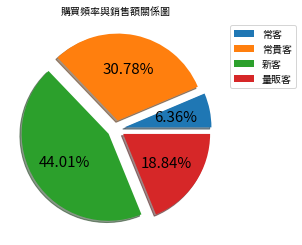

In [ ]:
#autopct=最後面的(%%)百分比符號
#fig, ax = plt.subplot()
text=["這是常客","這是常貴客","這是新客","這是量販客"]
fmpie = fm_list[['user_id','customer']].groupby("customer", as_index = True).sum()
fmpie.plot.pie(subplots=True,figsize=(4,4),textprops=textprops,autopct='%.2f%%',labeldistance=None,explode=(0.1,0.1,0.1,0.1),shadow=True,fontsize=15) # 只爆炸第二块饼，爆炸距离是半径的0.1。
#for i in range(len(text)):
#  plt.annotate(text[i],xy=(x,y),xytext=(2*np.sign(x),2*y),fontproperties=myfont,xycoords='data')
plt.title("購買頻率與銷售額關係圖",fontdict=textprops)
plt.legend(prop=myfont,bbox_to_anchor=(1, 1))
plt.axis('off')
#plt.legend(prop=myfont)

In [ ]:
!pip install tkinter 

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [ ]:
def file():
  savefile = input("請輸入你想要的名單,如:新客名單,常客名單,常貴客名單,量販客名單:")
  try:
    if savefile=='新客名單':
      x1=fm_list.query('customer == "新客"')
      x1=x1[['user_id','customer']]
      x1.to_csv("新客名單",encoding="utf-8")
      print("新客名單儲存成功!")
    elif savefile=='常客名單':
      x2=fm_list.query('customer == "常客"')
      x2=x2[['user_id','customer']]
      x2.to_csv("常客名單",encoding="utf-8")
      print("常客名單儲存成功!")
    elif savefile=='常貴客名單':
      x3=fm_list.query('customer == "常貴客"')
      x3=x3[['user_id','customer']]
      x3.to_csv("常貴客名單",encoding="utf-8")
      print("常貴客名單儲存成功!")
    elif savefile=='量販客名單':
      x4=fm_list.query('customer == "量販客"')
      x4=x4[['user_id','customer']]
      x4.to_csv("量販客名單",encoding="utf-8")
      print("量販客名單儲存成功!")
    elif savefile=='0':
      exit(0)
    else:
      print("請輸入正確格式,若要離開請輸入0") 
      file()
  except TypeError:
    print("輸入型態錯誤!")
    file()
file()

#tkMessageBox.askyesno('儲存檔案', '是否要儲存檔案?', parent=root_window)

請輸入你想要的名單,如:新客名單,常客名單,常貴客名單,量販客名單555
請輸入正確格式,若要離開請輸入0
請輸入你想要的名單,如:新客名單,常客名單,常貴客名單,量販客名單0


In [ ]:
'''
range()返回的是range object，而np.nrange()返回的是numpy.ndarray()
range儘可用於迭代，而np.nrange作用遠不止於此，它是一個序列，可被當做向量使用。

range()不支援步長為小數，np.arange()支援步長為小數

兩者都可用於迭代

兩者都有三個引數，以第一個引數為起點，第三個引數為步長，截止到第二個引數之前的不包括第二個引數的資料序列
'''

'\nrange()返回的是range object，而np.nrange()返回的是numpy.ndarray()\nrange儘可用於迭代，而np.nrange作用遠不止於此，它是一個序列，可被當做向量使用。\n\nrange()不支援步長為小數，np.arange()支援步長為小數\n\n兩者都可用於迭代\n\n兩者都有三個引數，以第一個引數為起點，第三個引數為步長，截止到第二個引數之前的不包括第二個引數的資料序列\n'

In [ ]:
'''
#as_index=False 時，索引就變成了自動生成的數字索引
# 找出每個顧客最近一次的購買日期
#recency這時的order_date是字符串
recent_recency = purchase_list.groupby("user_id", as_index = False)['order_date'].max()
recent_recency['order_date']=recent_recency['order_date'].apply(lambda _: datetime.datetime.strptime(_,"%Y-%m-%d")) #這時將字串變成datetime格式
# 計算消費者至今再次購買與上次購買產品的時間差'
recent_recency['recency'] =( theToday - recent_recency['order_date'] ).astype(str)
#可以透過iloc[索引號]來抽樣查看列的值
#例如:recent_recency.iloc[110:120]
recent_recency['recency']=recent_recency['recency'].str.replace('days.*','',regex=True)  #<==這行主要是將days的字符去除
recent_recency['recency'] = recent_recency['recency'].astype(int) #將欄位全部轉成int
#recent_recency['recency'].dtypes
#print(purchase_list['order_date'].dtypes)
purchase_list['order_date'] = pd.to_datetime(purchase_list['order_date']) #因為上面的strf將時間返回字符串所以這邊再將字串轉成datetime格式
#合併 recency
purchase_list = recent_recency.merge(purchase_list, # 即將合併上去的資料表
                  on = ['user_id', 'order_date'] # 兩表間連接的key
                  ,how='inner') # 合併的方式,預設只把相同的部分留下來 (inner 模式)
purchase_list =purchase_list.merge(frequency, # 即將合併上去的資料表
                  on = ['user_id'] # 兩表間連接的key
                  ,how='inner') # 合併的方式
purchase_list
'''

'\n#as_index=False 時，索引就變成了自動生成的數字索引\n# 找出每個顧客最近一次的購買日期\n#recency這時的order_date是字符串\nrecent_recency = purchase_list.groupby("user_id", as_index = False)[\'order_date\'].max()\nrecent_recency[\'order_date\']=recent_recency[\'order_date\'].apply(lambda _: datetime.datetime.strptime(_,"%Y-%m-%d")) #這時將字串變成datetime格式\n# 計算消費者至今再次購買與上次購買產品的時間差\'\nrecent_recency[\'recency\'] =( theToday - recent_recency[\'order_date\'] ).astype(str)\n#可以透過iloc[索引號]來抽樣查看列的值\n#例如:recent_recency.iloc[110:120]\nrecent_recency[\'recency\']=recent_recency[\'recency\'].str.replace(\'days.*\',\'\',regex=True)  #<==這行主要是將days的字符去除\nrecent_recency[\'recency\'] = recent_recency[\'recency\'].astype(int) #將欄位全部轉成int\n#recent_recency[\'recency\'].dtypes\n#print(purchase_list[\'order_date\'].dtypes)\npurchase_list[\'order_date\'] = pd.to_datetime(purchase_list[\'order_date\']) #因為上面的strf將時間返回字符串所以這邊再將字串轉成datetime格式\n#合併 recency\npurchase_list = recent_recency.merge(purchase_list, # 即將合併上去的資料表\n                  on = [\'user